# Random Forest Q1 (Company Data)

# Random Forest
 
Assignment:
**Problem Statement:**  
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.    



**About the data:**   
Let’s consider a Company dataset with around 10 variables and 400 records.   
The attributes are as follows:   
 Sales -- Unit sales (in thousands) at each location  
 Competitor Price -- Price charged by competitor at each location  
 Income -- Community income level (in thousands of dollars)  
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)  
 Population -- Population size in region (in thousands)  
 Price -- Price company charges for car seats at each site  
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site  
 Age -- Average age of the local population  
 Education -- Education level at each location  
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location  
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this:     
 


# 1. Import Libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
from io import StringIO
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn import externals
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## 2.  Import Data 

In [2]:
companey = pd.read_csv('Company_Data.csv')
companey

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# 3. EDA

In [3]:
companey.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [4]:
companey.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
companey.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

### checking outliers

C:\Users\shubham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

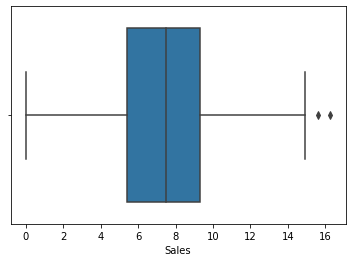

In [6]:
sns.boxplot(companey['Sales'])

#### we can see there are 2 outliers present in the data

Skewness = 0.18556036318721578
Kurtosis = -0.08087736743346197


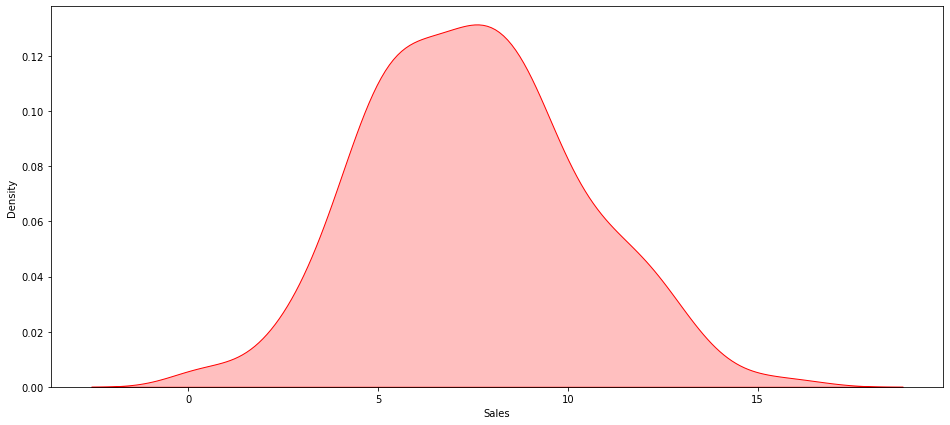

In [7]:
plt.figure(figsize=(16,7))
print("Skewness =",companey['Sales'].skew())
print("Kurtosis =",companey['Sales'].kurtosis())
sns.kdeplot(companey['Sales'],shade=True,color='r')
plt.show()

#### Sales Data is skewed to the right and Data has negative kurtosis

In [8]:
obj_colum = companey.select_dtypes(include='object')
obj_colum

,ShelveLoc,Urban,US
0,Bad,Yes,Yes
1,Good,Yes,Yes
2,Medium,Yes,Yes
3,Medium,Yes,Yes
4,Bad,Yes,No
...,...,...,...
395,Good,Yes,Yes
396,Medium,No,Yes
397,Medium,Yes,Yes
398,Bad,Yes,Yes


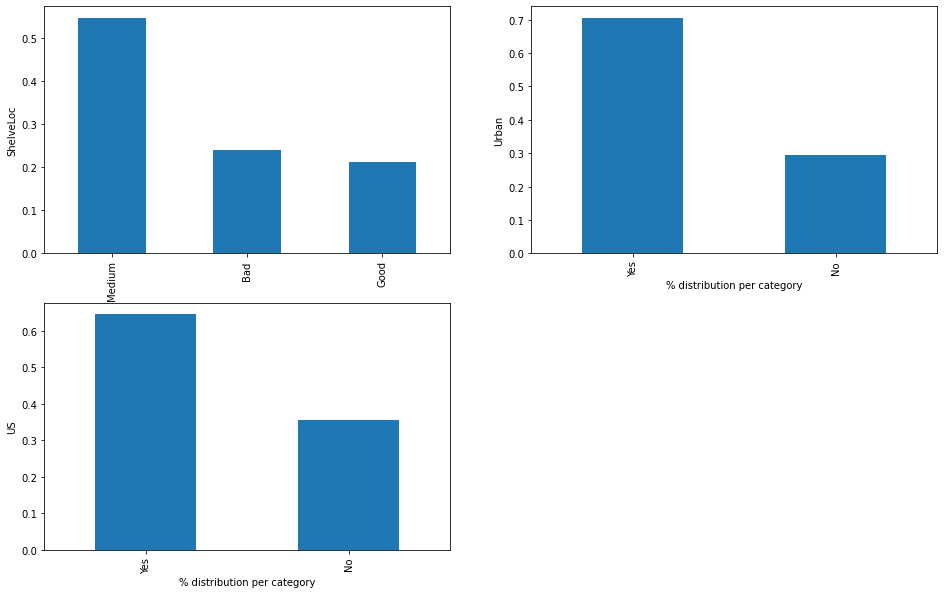

In [9]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    companey[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')


In [10]:
num_columns = companey.select_dtypes(include=['float64','int64'])
num_columns

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
0,9.50,138,73,11,276,120,42,17
1,11.22,111,48,16,260,83,65,10
2,10.06,113,35,10,269,80,59,12
3,7.40,117,100,4,466,97,55,14
4,4.15,141,64,3,340,128,38,13
...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14
396,6.14,139,23,3,37,120,55,11
397,7.41,162,26,12,368,159,40,18
398,5.94,100,79,7,284,95,50,12


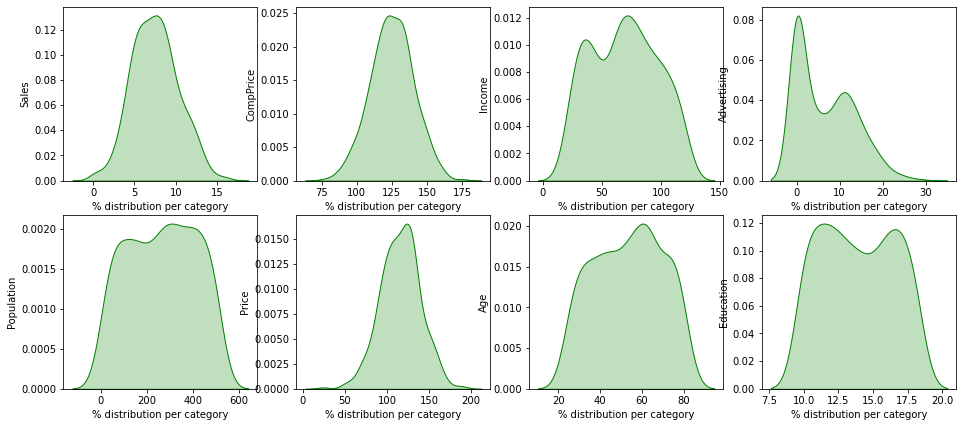

In [11]:
plt.figure(figsize=(16,30))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(companey[col],color='g',shade=True)
    plt.ylabel(col)
    plt.xlabel('% distribution per category')

In [12]:
pd.DataFrame(data=[num_columns.skew(),num_columns.kurtosis()],index=['skewness','kurtosis'])

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
skewness,0.185560,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007
kurtosis,-0.080877,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332


In [13]:
df = pd.get_dummies(companey, columns = ['ShelveLoc','Urban','US'])

In [14]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [15]:
corr = df.corr()

<AxesSubplot:>

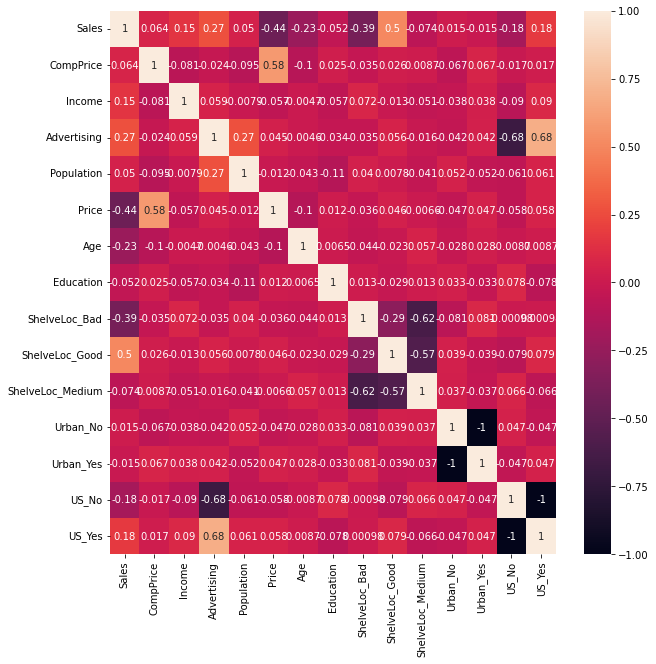

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

# 4. Model Building

#### Since the target variable is continious, we create a class of the value based on the mean

In [17]:
df['Sales'].mean()

7.496325

In [18]:
df["Sales"]

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

### for <= 7.49 = "small" and > 7.49 = "Large"

#### Creating new column as sales

In [19]:
df['sales']="small"

#### replacing the values(small) which are greater than 7.49 with large

In [20]:
df.loc[df["Sales"]>7.49,"sales"]="large"

#### Droping the Sales column

In [21]:
df.drop(["Sales"],axis=1,inplace=True)

In [22]:
df

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,sales
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,large
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,large
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,large
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,small
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1,large
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1,small
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1,small
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1,small


In [23]:
x = df.iloc[:,0:14]
x

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [24]:
y =df['sales']

df.sales.value_counts()

small    201
large    199
Name: sales, dtype: int64

# 5. Model Traning

##  Random Forest  - Model using Entropy Criteria

### Splitting data into training and testing data set

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, stratify = y)

In [26]:
y_train.value_counts()

small    161
large    159
Name: sales, dtype: int64

## Building Random Forest Classifier 

In [27]:
model =RandomForestClassifier(n_jobs=4,n_estimators = 150, oob_score =True,criterion ='entropy') 
model.fit(x_train,y_train)
model.oob_score_

0.784375

In [28]:
pred_train = model.predict(x_train)

#### accuracy check

In [29]:
accuracy_score(y_train,pred_train)

1.0

In [30]:
confusion_matrix(y_train,pred_train)

array([[159,   0],
       [  0, 161]], dtype=int64)

In [31]:
pred_test = model.predict(x_test)

#### accuracy check

In [32]:
accuracy_score(y_test,pred_test)

0.8

In [33]:
confusion_matrix(y_test,pred_test)

array([[32,  8],
       [ 8, 32]], dtype=int64)

# Visulizaing graph

In [34]:
df_RF=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})


In [35]:
df_RF

,Actual,Predicted
386,small,small
307,small,small
47,small,small
242,small,small
256,small,small
...,...,...
221,small,small
362,small,small
243,large,large
354,small,small


In [36]:
model.feature_importances_

array([0.1197807 , 0.10051581, 0.07880429, 0.08783112, 0.22826174,
       0.13286984, 0.06431853, 0.04075786, 0.0764499 , 0.02150915,
       0.01153003, 0.01221579, 0.01345363, 0.01170162])

In [37]:
feature_importance = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [38]:
feature_importance

,feature,importance
4,Price,0.228262
5,Age,0.132870
0,CompPrice,0.119781
1,Income,0.100516
3,Population,0.087831
2,Advertising,0.078804
8,ShelveLoc_Good,0.076450
6,Education,0.064319
7,ShelveLoc_Bad,0.040758
9,ShelveLoc_Medium,0.021509


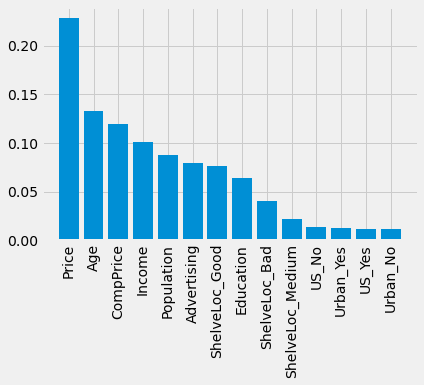

In [39]:
plt.style.use('fivethirtyeight')
plt.bar(feature_importance['feature'],feature_importance['importance'], orientation = 'vertical')
plt.xticks(rotation = 90)
plt.show()

#### As seen in the above chart, Price most important feature

# END